<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
Data Head rows and columns : 
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5       

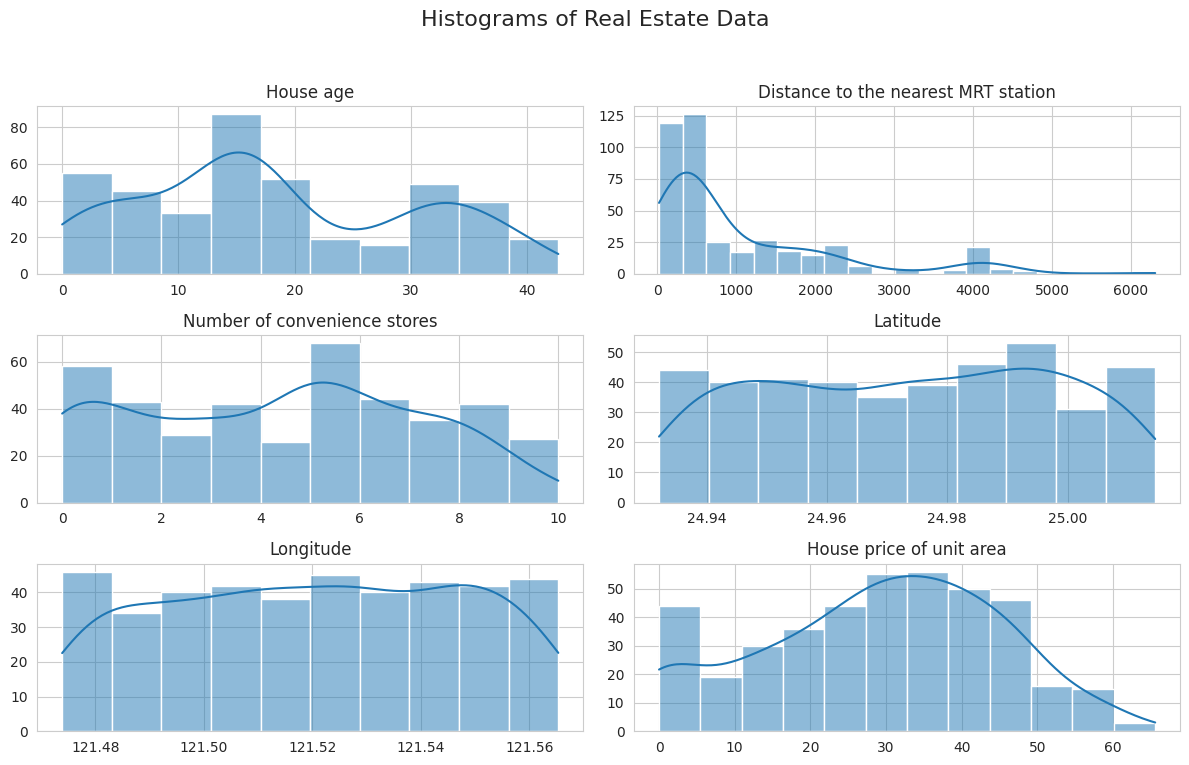

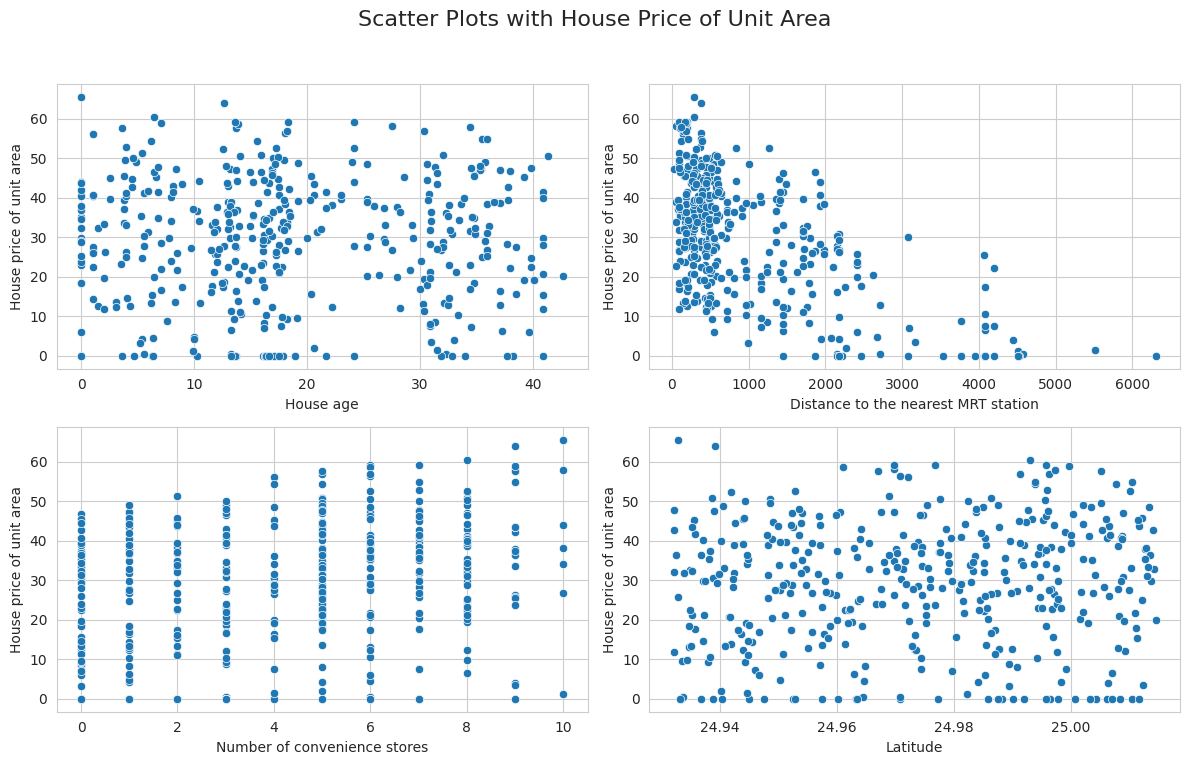

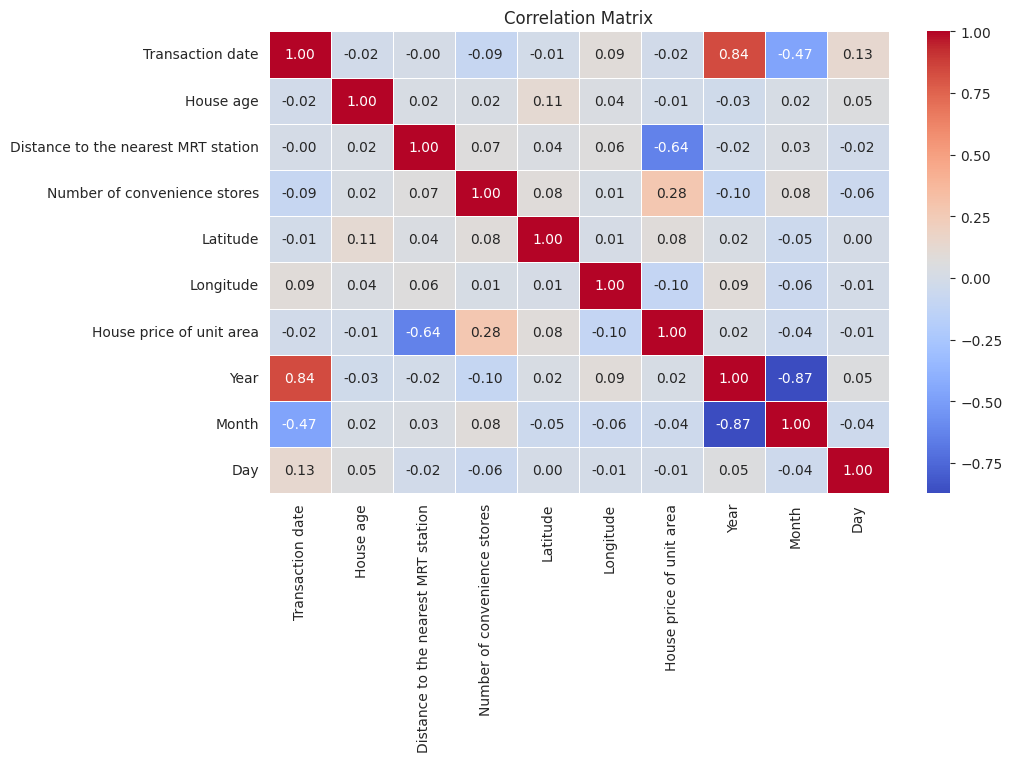

Correlation matrix of Numeric Features :                                      Transaction date  House age  \
Transaction date                             1.000000  -0.020135   
House age                                   -0.020135   1.000000   
Distance to the nearest MRT station         -0.001400   0.021596   
Number of convenience stores                -0.088155   0.021973   
Latitude                                    -0.011480   0.114345   
Longitude                                    0.091629   0.036449   
House price of unit area                    -0.017975  -0.012284   
Year                                         0.836344  -0.025535   
Month                                       -0.468024   0.018921   
Day                                          0.132839   0.053499   

                                     Distance to the nearest MRT station  \
Transaction date                                               -0.001400   
House age                                                 

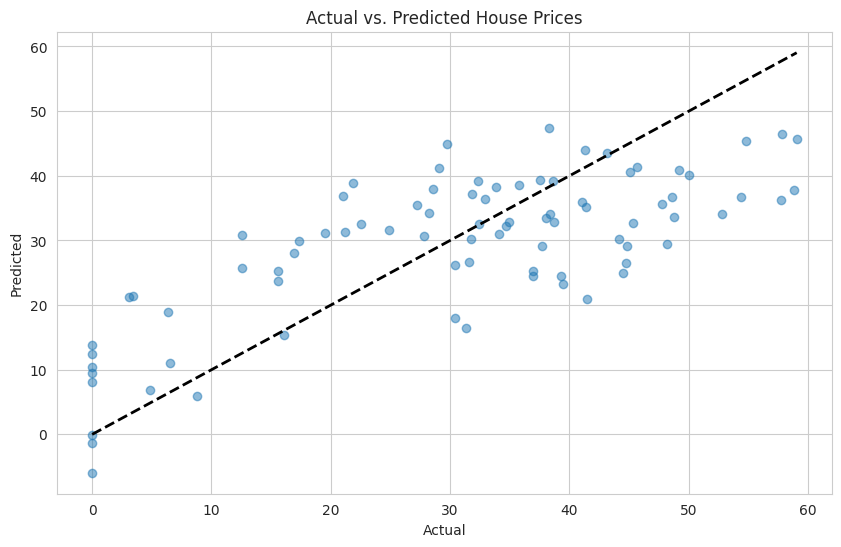

 Linear regression model Accuracy is : 0.5496730640943475


In [ ]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


class House_Rent:
    def __init__(self,data):
        try:
            self.data=data
            self.data_head=self.data.head()
            self.data_info=self.data.info()
            print(f"Data Head rows and columns : \n{self.data_head}")
            print(f"Information about Data Set : \n{self.data_info}")
        except FileNotFoundError:
            print("Error: File not found.")
        except Exception as e:
            error_type,error_msg,err_line=sys.exc_info()
            print(f"Error_type-{error_type.__name__} -> Error MSg {error_msg}-> Err Line {err_line.tb_lineno}")
    def Isnull(self):
        try:
            self.is_null=self.data.isnull().sum()
            print(f"Summary of Null values :\n{self.is_null}")
        except Exception as e:
            error_type,error_msg,err_line=sys.exc_info()
            print(f"Error_type-{error_type.__name__} -> Error MSg {error_msg}-> Err Line {err_line.tb_lineno}")
    def descriptive_stas_data(self):
        try:
            self.descriptive_stas=self.data.describe()
            print(f"Descriptive statistics of the dataset :\n{self.descriptive_stas}")
        except Exception as e:
            error_type,error_msg,err_line=sys.exc_info()
            print(f"Error_type-{error_type.__name__} -> Error MSg {error_msg}-> Err Line {err_line.tb_lineno}")
    def Histograms_num_features(self):
        try:
            # Set the aesthetic style of the plots
            sns.set_style("whitegrid")

            # Create histograms for the numerical columns
            fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
            fig.suptitle('Histograms of Real Estate Data', fontsize=16)

            cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
                    'Latitude', 'Longitude', 'House price of unit area']

            for i, col in enumerate(cols):
                sns.histplot(self.data[col], kde=True, ax=axes[i // 2, i % 2])
                axes[i // 2, i % 2].set_title(col)
                axes[i // 2, i % 2].set_xlabel('')
                axes[i // 2, i % 2].set_ylabel('')

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()

        except Exception as e:
            error_type,error_msg,err_line=sys.exc_info()
            print(f"Error_type-{error_type.__name__} -> Error MSg {error_msg}-> Err Line {err_line.tb_lineno}")
    def relationship_house_price(self):
        try:
            # Scatter plots to observe the relationship with house price
            fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
            fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

            # Scatter plot for each variable against the house price
            sns.scatterplot(data=self.data, x='House age', y='House price of unit area', ax=axes[0, 0])
            sns.scatterplot(data=self.data, x='Distance to the nearest MRT station',
                            y='House price of unit area', ax=axes[0, 1])
            sns.scatterplot(data=self.data, x='Number of convenience stores', y='House price of unit area',
                            ax=axes[1, 0])
            sns.scatterplot(data=self.data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
        except Exception as e:
            error_type,error_msg,err_line=sys.exc_info()
            print(f"Error_type-{error_type.__name__} -> Error MSg {error_msg}-> Err Line {err_line.tb_lineno}")
    def num_features_corr_matrix(self):
        try:
            self.data['Transaction date'] = pd.to_datetime(self.data['Transaction date'])
            self.data['Year'] = pd.to_datetime(self.data['Transaction date']).dt.year
            self.data['Month'] = pd.to_datetime(self.data['Transaction date']).dt.month
            self.data['Day'] = pd.to_datetime(self.data['Transaction date']).dt.day
            # Correlation matrix
            correlation_matrix = self.data.corr()

            # Plotting the correlation matrix
            plt.figure(figsize=(10, 6))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
            plt.title('Correlation Matrix')
            plt.show()

            print(f"Correlation matrix of Numeric Features : {correlation_matrix}")
        except Exception as e:
            error_type,error_msg,err_line=sys.exc_info()
            print(f"Error_type-{error_type.__name__} -> Error MSg {error_msg}-> Err Line {err_line.tb_lineno}")
    def select_algo_train(self):
        try:
            features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
            target = 'House price of unit area'

            X = self.data[features]
            y = self.data[target]

            # Splitting the dataset into training and testing sets
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            self.model = LinearRegression()
            self.model.fit(self.X_train, self.y_train)
        except Exception as e:
            error_type,error_msg,err_line=sys.exc_info()
            print(f"Error_type-{error_type.__name__} -> Error MSg {error_msg}-> Err Line {err_line.tb_lineno}")
    def predictive_modelling(self):
        try:
            self.y_pred_lr = self.model.predict(self.X_test)
            # Visualization: Actual vs. Predicted values
            plt.figure(figsize=(10, 6))
            plt.scatter(self.y_test, self.y_pred_lr, alpha=0.5)
            plt.plot([self.y_test.min(), self.y_test.max()], [self.y_test.min(), self.y_test.max()], 'k--', lw=2)
            plt.xlabel('Actual')
            plt.ylabel('Predicted')
            plt.title('Actual vs. Predicted House Prices')
            plt.show()
            print(f" Linear regression model Accuracy is : {r2_score(self.y_test,self.y_pred_lr)}")
        except Exception as e:
            error_type,error_msg,err_line=sys.exc_info()
            print(f"Error_type-{error_type.__name__} -> Error MSg {error_msg}-> Err Line {err_line.tb_lineno}")
if __name__=='__main__':
    try:
        object=House_Rent(data=pd.read_csv('Real_Estate.csv'))# Load the dataset
        object.Isnull()
        object.descriptive_stas_data()
        object.Histograms_num_features()
        object.relationship_house_price()
        object.num_features_corr_matrix()
        object.select_algo_train()
        object.predictive_modelling()
    except Exception as e:
        error_type, error_msg, err_line = sys.exc_info()
        print(f"Error_type-{error_type.__name__} -> Error MSg {error_msg}-> Err Line {err_line.tb_lineno}")

